In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#loading the data
dataset=pd.read_csv('winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#shape of datasets
print("shape of our datasets of Red-Wine:{s}".format(s=dataset.shape))
print("Column headers/names:{s}".format(s=list(dataset)))

shape of our datasets of Red-Wine:(1599, 12)
Column headers/names:['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
dataset.quality.value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

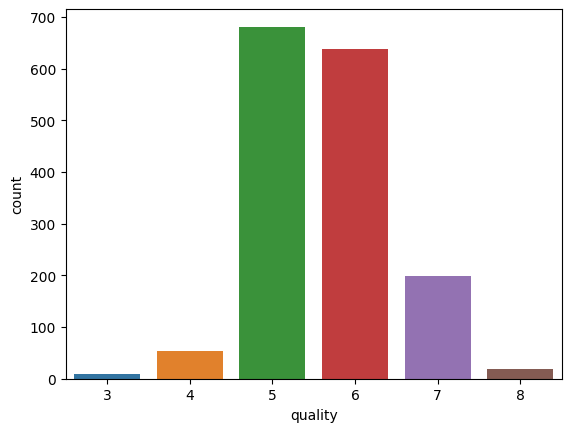

In [8]:
sns.countplot(x='quality',data=dataset)

In [9]:
dataset['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [10]:
dataset['sulphates'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [11]:
dataset['citric acid'].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [12]:
dataset['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [13]:
dataset['residual sugar'].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [15]:
Q1=dataset.quantile(0.2)
Q3=dataset.quantile(0.8)
IQR=Q3-Q1
print(IQR)

fixed acidity            2.700000
volatile acidity         0.290000
citric acid              0.390000
residual sugar           0.900000
chlorides                0.027000
free sulfur dioxide     18.000000
total sulfur dioxide    50.000000
density                  0.002834
pH                       0.244000
sulphates                0.220000
alcohol                  1.800000
quality                  1.000000
dtype: float64


In [16]:
dataset_out = dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
dataset_out.shape


(1334, 12)

In [17]:
dataset_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
correlations=dataset_out.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.118764
volatile acidity       -0.364576
citric acid             0.219569
residual sugar          0.007258
chlorides              -0.149243
free sulfur dioxide    -0.032280
total sulfur dioxide   -0.220527
density                -0.195323
pH                     -0.040381
sulphates               0.417443
alcohol                 0.492316
Name: quality, dtype: float64


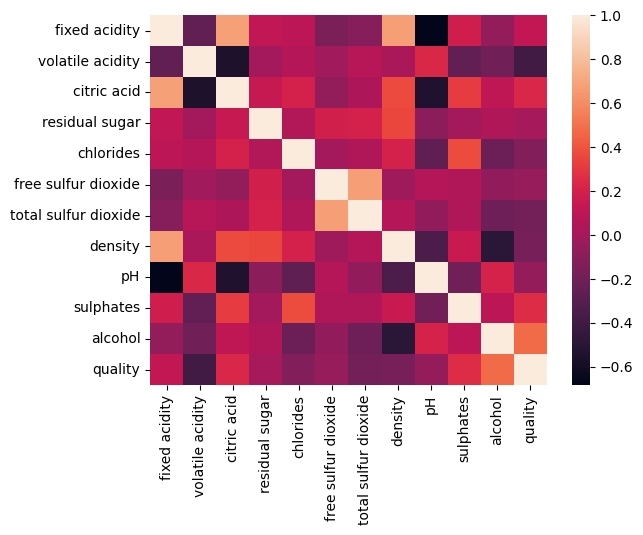

In [19]:
sns.heatmap(dataset.corr())
plt.show()

In [20]:
#impact of various factor on quality
correlations.sort_values(ascending=False)

alcohol                 0.492316
sulphates               0.417443
citric acid             0.219569
fixed acidity           0.118764
residual sugar          0.007258
free sulfur dioxide    -0.032280
pH                     -0.040381
chlorides              -0.149243
density                -0.195323
total sulfur dioxide   -0.220527
volatile acidity       -0.364576
Name: quality, dtype: float64

In [21]:
def get_features(correlation_threshold):
    abs_corrs=correlations.abs()
    high_correlations=abs_corrs[abs_corrs>correlation_threshold].index.values.tolist()
    return high_correlations

In [22]:
#taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.05)
print(features)
x=dataset_out[features]
y=dataset_out['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Alcohol'),
 Text(0.5, 1.0, 'Alcohol % in different samples')]

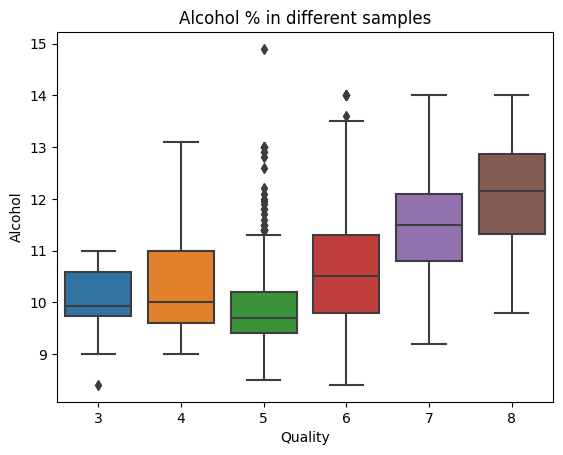

In [23]:
#to finding the no of outiers we have in our dataset with properties
bx=sns.boxplot(x='quality',y='alcohol',data=dataset)
bx.set(xlabel='Quality',ylabel='Alcohol',title='Alcohol % in different samples')

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 1.0, 'Citric Acid % in different samples')]

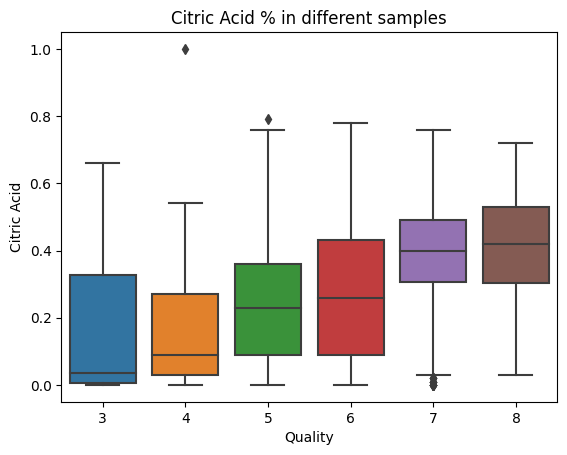

In [24]:
bx=sns.boxplot(x='quality',y='citric acid',data=dataset)
bx.set(xlabel='Quality',ylabel='Citric Acid',title='Citric Acid % in different samples')

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 1.0, 'Fixed Acidity % in different samples')]

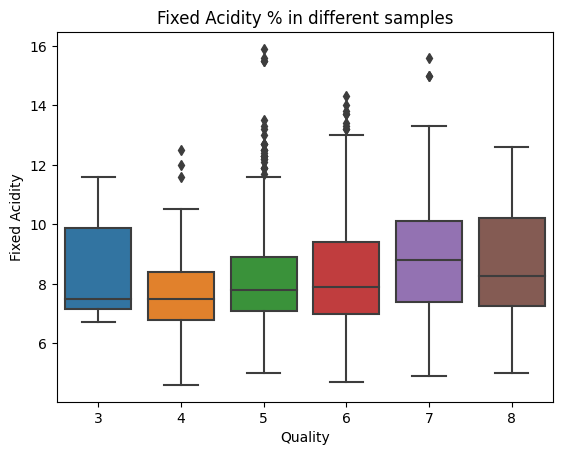

In [25]:
bx=sns.boxplot(x='quality',y='fixed acidity',data=dataset)
bx.set(xlabel='Quality',ylabel='Fixed Acidity',title='Fixed Acidity % in different samples')

In [26]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2


In [27]:
y


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1334, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)

In [29]:
#x_train.shape
#x_test.shape
#y_train.shape
y_test.shape

(401,)

In [30]:
#fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [31]:
#To retrieve the intercept
regressor.intercept_

60.68502614975954

In [32]:
#this gives thecoefficients of the 10 features selected above.
regressor.coef_

array([ 8.58165511e-02, -8.59177117e-01, -3.64687641e-01,  9.40927968e-01,
       -1.58925613e-03, -5.90958210e+01,  1.71027805e+00,  2.48642398e-01])

In [34]:
train_pred = regressor.predict(x_train)
train_pred

array([5.68314583, 5.66988454, 5.85757418, 6.22659496, 6.41367418,
       5.62444427, 6.96293472, 5.30540567, 5.432503  , 5.05637447,
       5.22865175, 4.76583157, 5.31343502, 5.20403606, 5.29435893,
       5.06098896, 5.59344949, 6.09373018, 5.78592024, 4.99431061,
       5.03508561, 4.96088099, 5.63795418, 5.45097714, 6.69988637,
       6.19332091, 4.92006441, 5.04702847, 5.68647295, 5.68484063,
       5.26113568, 5.13784932, 5.11848533, 5.50169256, 5.97502606,
       5.91454534, 5.9688432 , 6.26527055, 5.70447863, 5.22398922,
       5.1951678 , 5.7336544 , 6.07139052, 6.20923465, 5.47997461,
       5.96177632, 5.83650909, 5.52281307, 5.0973415 , 5.4856432 ,
       5.70275392, 6.52254311, 6.05561923, 5.02918694, 5.48037499,
       5.92027073, 5.95017039, 6.0426431 , 5.38774337, 5.44375368,
       5.47472728, 5.42571842, 5.34603467, 5.58525948, 4.96349348,
       4.91831184, 5.29425019, 6.0169216 , 6.62605531, 5.33740231,
       5.14476501, 5.28370168, 5.18238816, 6.740342  , 6.19391

In [35]:
test_pred = regressor.predict(x_test)
test_pred

array([5.63029669, 6.61864826, 5.35794052, 5.99350496, 5.39852486,
       5.22874336, 5.85593654, 5.91572845, 5.98700814, 6.25626197,
       5.11669921, 5.86811442, 5.0816244 , 5.14476501, 5.90816534,
       5.81640215, 5.02313008, 5.478131  , 6.12494099, 5.46779115,
       4.93566436, 5.9272754 , 4.96088099, 5.62761854, 5.30647743,
       5.53161243, 5.49832231, 5.04517765, 4.98081341, 6.03680719,
       5.79321325, 6.01533774, 6.18011141, 4.92938118, 5.7756646 ,
       4.7678461 , 5.96816479, 6.49939589, 5.7441051 , 5.77595024,
       5.27981502, 5.53069839, 5.53161243, 5.05416608, 6.0764887 ,
       5.03248717, 6.37401383, 5.904467  , 5.45852661, 5.84996537,
       5.05159042, 5.1043692 , 5.9612874 , 5.14585882, 6.5409529 ,
       5.15358995, 5.85764004, 5.30302691, 5.37183582, 5.02058543,
       6.01577414, 5.53354485, 5.18691213, 5.44908298, 5.0029518 ,
       5.95328691, 5.19463799, 6.97082998, 6.01651617, 5.19550631,
       5.37792893, 6.106477  , 6.10590769, 5.30482163, 5.02976

In [36]:
train_rmse = metrics.mean_squared_error(train_pred,y_train)**0.5
train_rmse

0.5756334309288693

In [37]:
test_rmse = metrics.mean_squared_error(test_pred,y_test)**0.5
test_rmse

0.5765305295139872

In [38]:
#rounding off the predicted values for test set
predicted_data=np.round_(test_pred)
predicted_data

array([6., 7., 5., 6., 5., 5., 6., 6., 6., 6., 5., 6., 5., 5., 6., 6., 5.,
       5., 6., 5., 5., 6., 5., 6., 5., 6., 5., 5., 5., 6., 6., 6., 6., 5.,
       6., 5., 6., 6., 6., 6., 5., 6., 6., 5., 6., 5., 6., 6., 5., 6., 5.,
       5., 6., 5., 7., 5., 6., 5., 5., 5., 6., 6., 5., 5., 5., 6., 5., 7.,
       6., 5., 5., 6., 6., 5., 5., 6., 6., 5., 5., 6., 6., 5., 6., 6., 5.,
       6., 5., 5., 6., 6., 6., 6., 6., 6., 6., 5., 6., 6., 6., 5., 6., 5.,
       5., 6., 6., 5., 5., 6., 5., 5., 7., 6., 5., 5., 6., 5., 5., 6., 6.,
       6., 6., 5., 5., 5., 6., 5., 6., 5., 5., 6., 5., 5., 7., 6., 5., 5.,
       5., 5., 5., 5., 6., 7., 5., 5., 5., 6., 5., 7., 5., 5., 5., 6., 7.,
       5., 6., 5., 6., 6., 6., 5., 5., 6., 6., 6., 5., 6., 6., 5., 6., 5.,
       5., 5., 5., 6., 7., 6., 6., 5., 6., 6., 5., 5., 6., 6., 5., 6., 5.,
       6., 5., 5., 6., 6., 7., 6., 6., 6., 6., 5., 6., 5., 6., 5., 6., 6.,
       6., 5., 5., 5., 6., 5., 5., 6., 5., 6., 5., 7., 5., 5., 5., 6., 6.,
       6., 5., 5., 6., 6.

In [39]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,test_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,test_pred))
rmse=np.sqrt(metrics.mean_squared_error(y_test,test_pred))
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 0.44267146812856084
Mean Squared Error: 0.3323874514616784
Root Mean Squared Error: 0.5765305295139872


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,test_pred)

0.30847154117622777

In [41]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns=['Coeffecient']
coeffecients

,Coeffecient
fixed acidity,0.085817
volatile acidity,-0.859177
citric acid,-0.364688
chlorides,0.940928
total sulfur dioxide,-0.001589
density,-59.095821
sulphates,1.710278
alcohol,0.248642


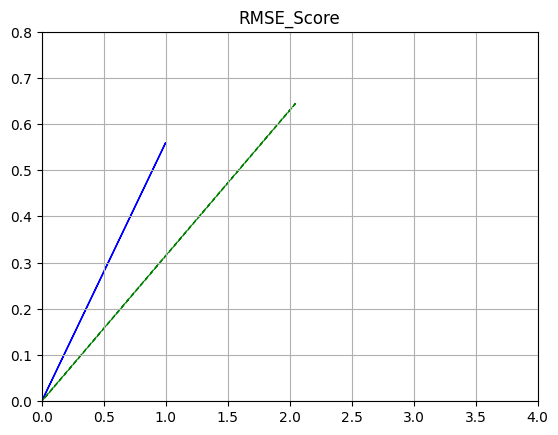

In [42]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1='green'
color2='blue'
ax.arrow(0,0,1,0.56,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,2,0.63,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.8])
ax.set_xlim([0,4])
plt.grid()
plt.title('RMSE_Score')
plt1.show()

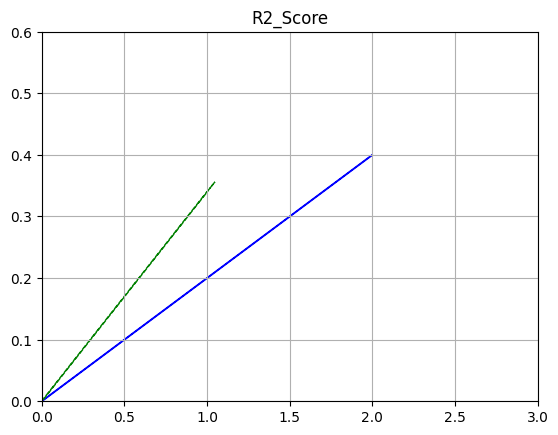

In [43]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1='green'
color2='blue'
ax.arrow(0,0,2,0.40,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,1,0.34,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('R2_Score')
plt1.show()

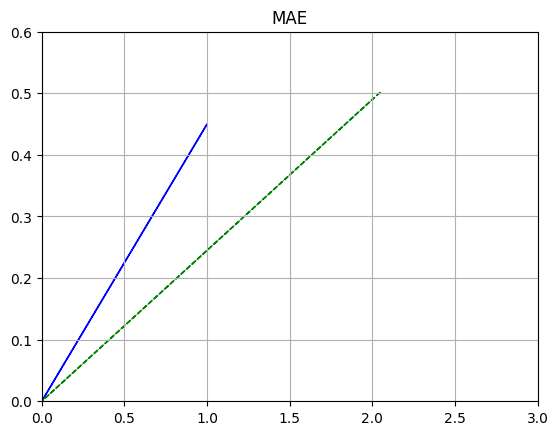

In [44]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1='green'
color2='blue'
ax.arrow(0,0,1,0.45,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,2,0.49,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('MAE')
plt1.show()